次に中間層の要素数を減らしてみよう。32個にしてみる。

In [37]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [38]:
import numpy as np

In [39]:
batch_size = 128
epochs = 50

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [40]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [41]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

In [42]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/50
11791/11791 [==============================] - 0s - loss: 0.0939 - acc: 0.0071 - val_loss: 0.0551 - val_acc: 0.0095
Epoch 2/50
11791/11791 [==============================] - 0s - loss: 0.0541 - acc: 0.0075 - val_loss: 0.0521 - val_acc: 0.0095
Epoch 3/50
11791/11791 [==============================] - 0s - loss: 0.0529 - acc: 0.0063 - val_loss: 0.0514 - val_acc: 0.0080
Epoch 4/50
11791/11791 [==============================] - 0s - loss: 0.0506 - acc: 0.0096 - val_loss: 0.0478 - val_acc: 0.0075
Epoch 5/50
11791/11791 [==============================] - 0s - loss: 0.0471 - acc: 0.0098 - val_loss: 0.0442 - val_acc: 0.0095
Epoch 6/50
11791/11791 [==============================] - 0s - loss: 0.0441 - acc: 0.0109 - val_loss: 0.0413 - val_acc: 0.0116
Epoch 7/50
11791/11791 [==============================] - 0s - loss: 0.0418 - acc: 0.0120 - val_loss: 0.0390 - val_acc: 0.0105
Epoch 8/50
11791/11791 [==============================] - 0s -

## Testing results 

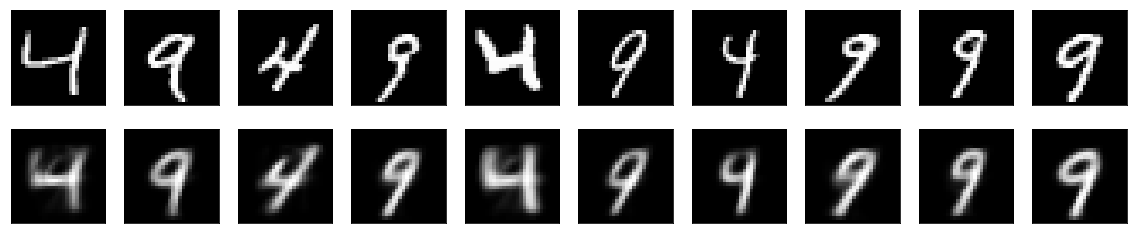

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

画像に変化があらわれはじめた。中間層数をもっと少なくできるのだろうか。